# Задача
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Can you predict if the customer is going to honor the reservation or cancel it?

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
Hotel_Reservation_Data = "Hotel Reservations.csv"
Hotel_Reservation_Data = pd.read_csv(Hotel_Reservation_Data)
Hotel_Reservation_Data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Знакомимся с датасетом

In [163]:
Hotel_Reservation_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [164]:
Hotel_Reservation_Data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [165]:
Hotel_Reservation_Data.tail(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36266,INN36267,2,0,2,2,Meal Plan 1,0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96,1,Canceled
36267,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36269,INN36270,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


# Описание датасета
The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.

Data Dictionary

- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

In [166]:
print(Hotel_Reservation_Data.shape)
print(Hotel_Reservation_Data.columns)

(36275, 19)
Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


In [167]:
Hotel_Reservation_Data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


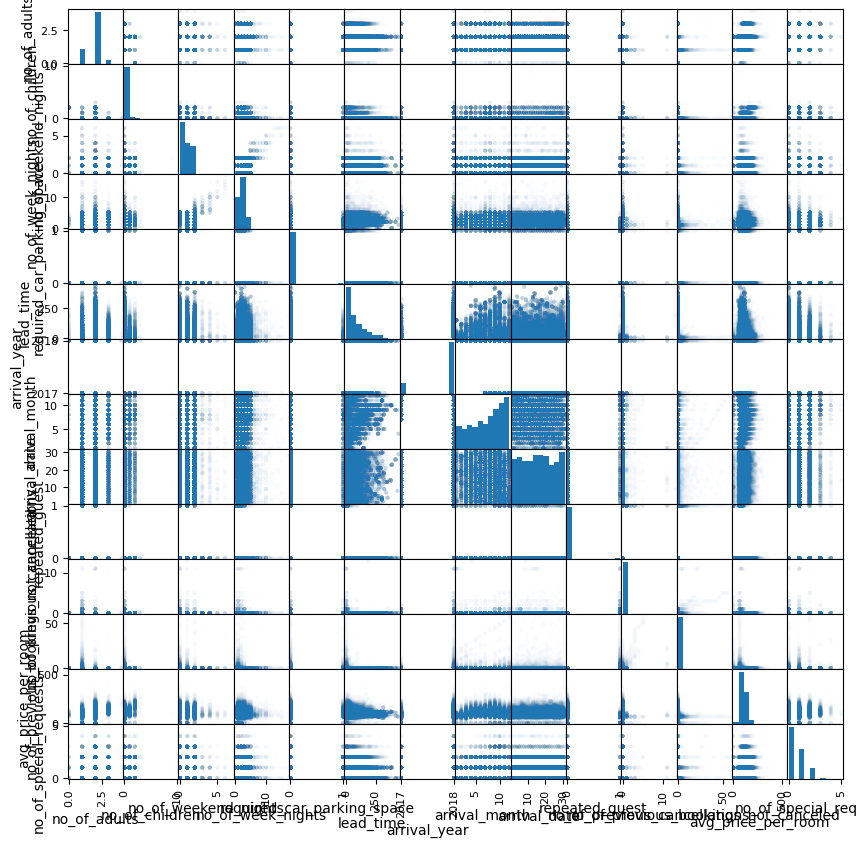

In [168]:
from pandas.plotting import scatter_matrix
scatter_matrix(Hotel_Reservation_Data, alpha = .01, figsize = (10, 10))
pass

In [169]:
Hotel_Reservation_Data.corr()

C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\1831556770.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Hotel_Reservation_Data.corr()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


In [170]:
# В датасете есть категориальные признаки
Categorical_Features = Hotel_Reservation_Data.select_dtypes(['object'])
Categorical_Features.columns

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

In [171]:
# Числовые признаки
Numerical_Features = Hotel_Reservation_Data.select_dtypes(['float64','int64'])
Numerical_Features.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

no_of_adults
-0.3332811480628733


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


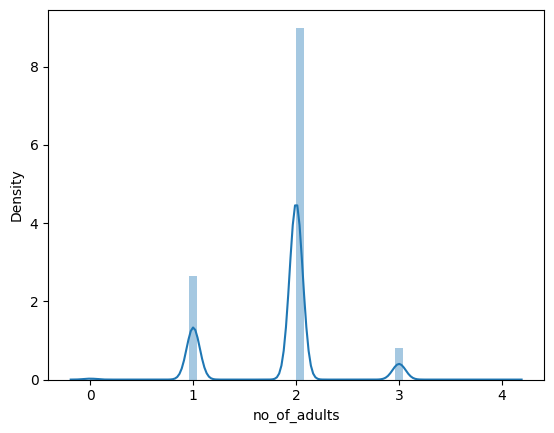

no_of_children
4.710154739583836


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


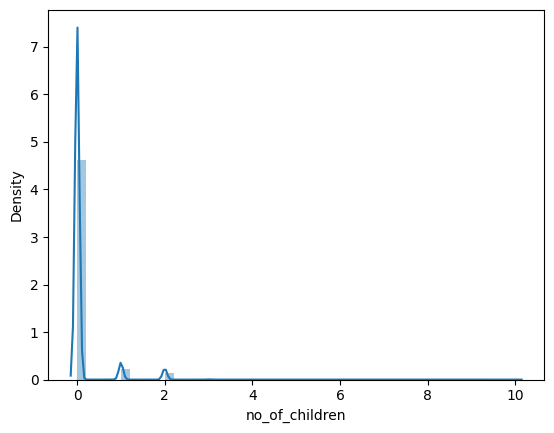

no_of_weekend_nights
0.7375854562511297


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


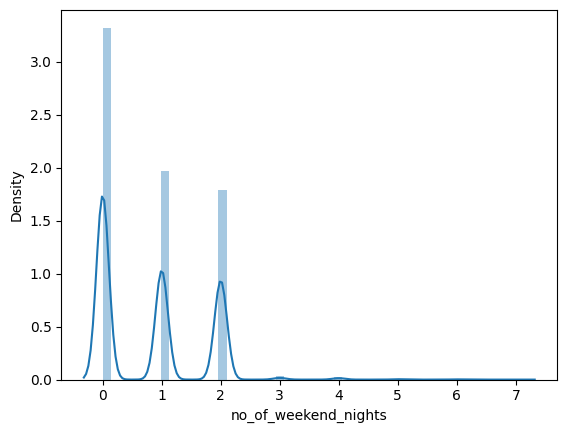

no_of_week_nights
1.5992842300276306


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


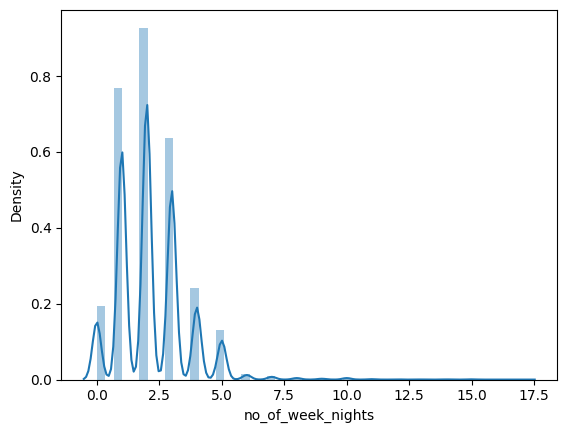

required_car_parking_space
5.413419252495181


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


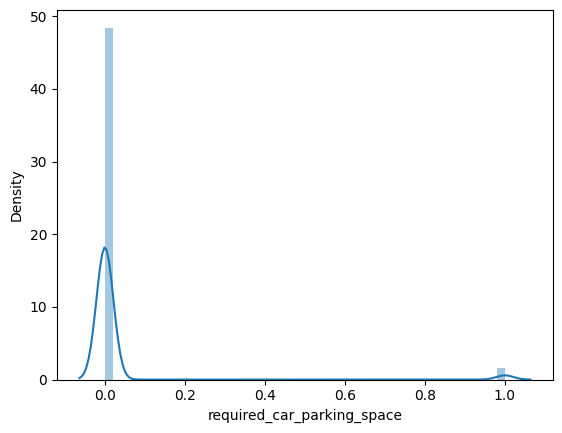

lead_time
1.292438086907913


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


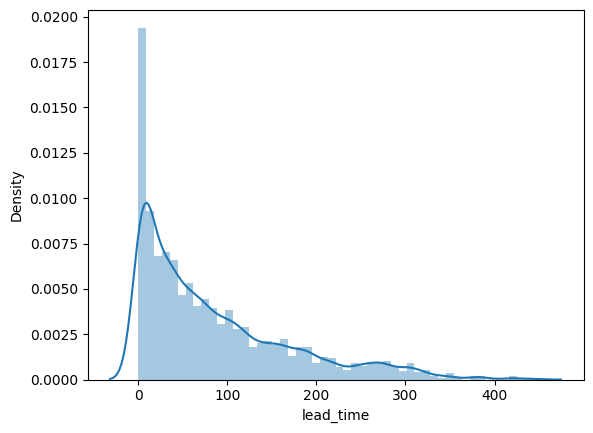

arrival_year
-1.6696263055349456


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


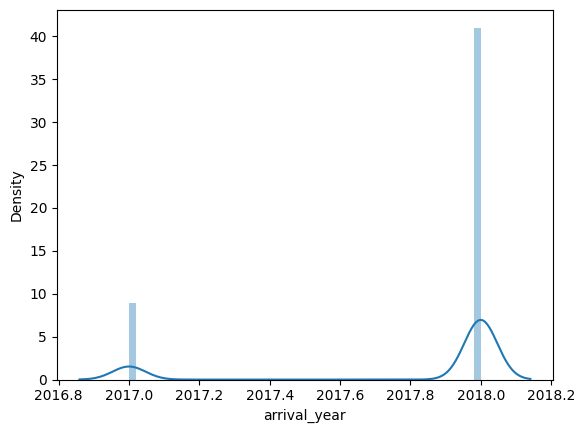

arrival_month
-0.3482144521729693


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


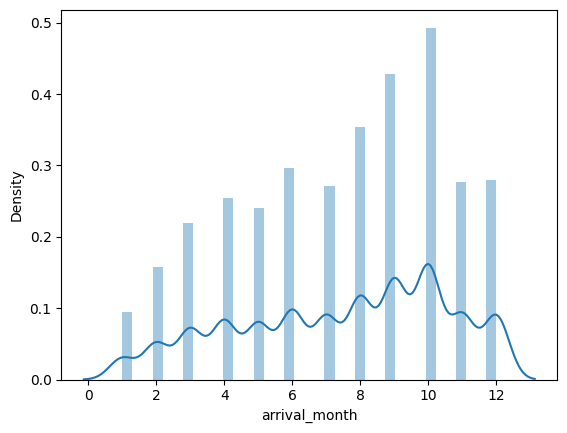

arrival_date
0.02880737786859992


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


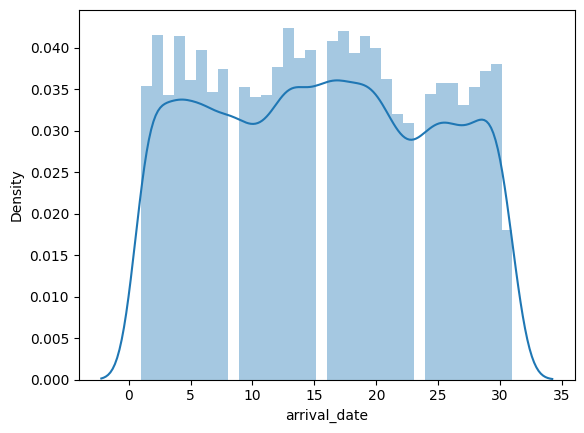

repeated_guest
6.002640120051878


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


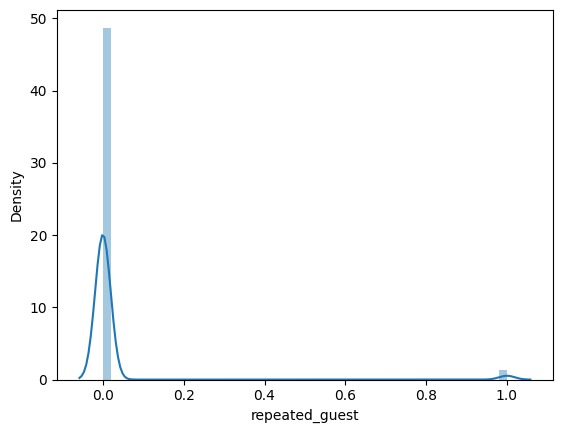

no_of_previous_cancellations
25.19883390526328


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


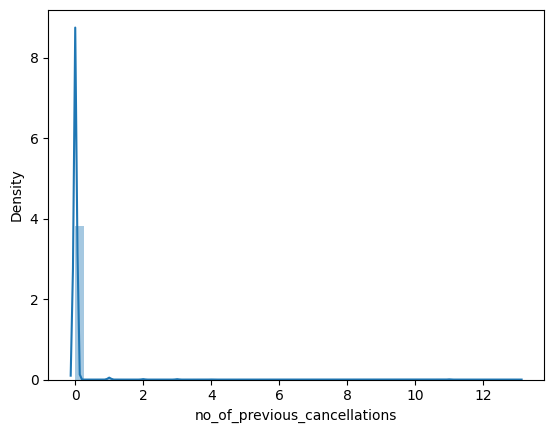

no_of_previous_bookings_not_canceled
19.249394657611052


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


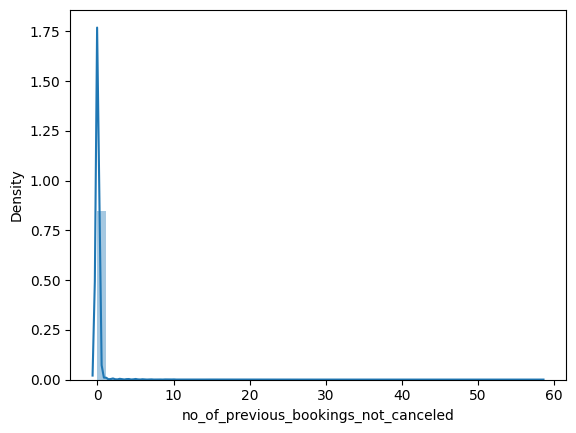

avg_price_per_room
0.6671052879080165


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


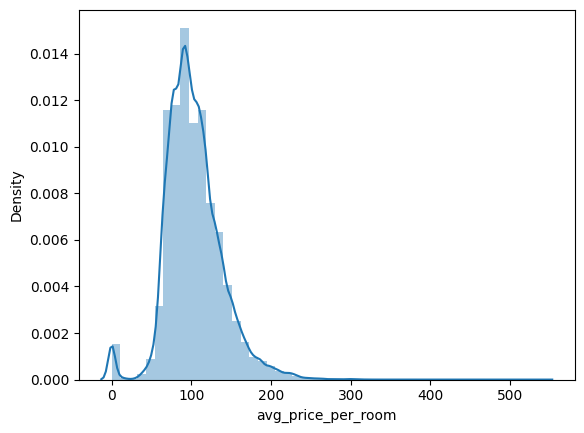

no_of_special_requests
1.1450334208536157


C:\Users\Nick\AppData\Local\Temp\ipykernel_1716\2276476662.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hotel_Reservation_Data[col])


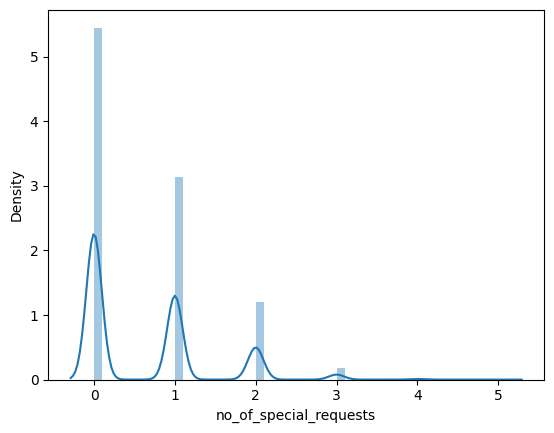

In [172]:
from scipy.stats import skew
for col in Numerical_Features.columns:
    print(col)
    print(skew(Hotel_Reservation_Data[col]))
    
    plt.figure()
    sns.distplot(Hotel_Reservation_Data[col])
    plt.show()

Как можно увидеть, у большинства признаков значение скошенности лежит в промежутке от 0 до 0.5, так что их можно назвать довольно симметричными. У других же признаков значение скошенности весьма велико, и мы можем уменьшить его путем различных трансформаций.

# Готовим данные

In [173]:
# Проверяем дубликаты
Hotel_Reservation_Data.duplicated().sum()

0

In [174]:
# Проверяем пропущенные значения
Hotel_Reservation_Data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Как мы видим, пропущенных значений нет. Если бы они были, можно было бы заполнить их медианой/модой:

In [175]:
# imputing missing values
#def Fill_na(var):
    #if ((var.dtype=="float") or (var.dtype == "int64")):
        #var = var.fillna(var.media/mean())
    #elif ((var.dtype=="object") or (var.dtype == "O")):
        #var = var.fillna(var.mode()[0])
    #else:
       # var
   # return var 

In [176]:
# Избавляемся от колонки Booking_ID
Hotel_Reservation_Data.drop(columns='Booking_ID', inplace=True)

In [177]:
len(Hotel_Reservation_Data.columns)

18

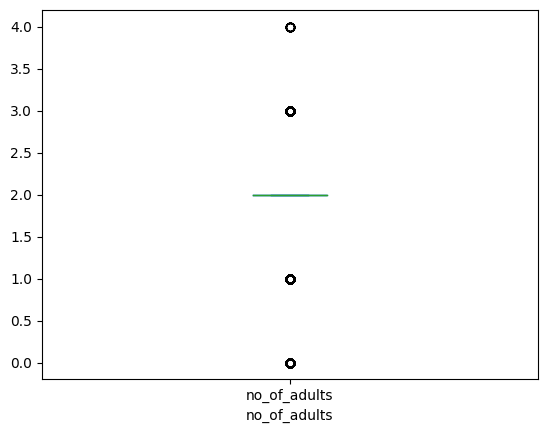

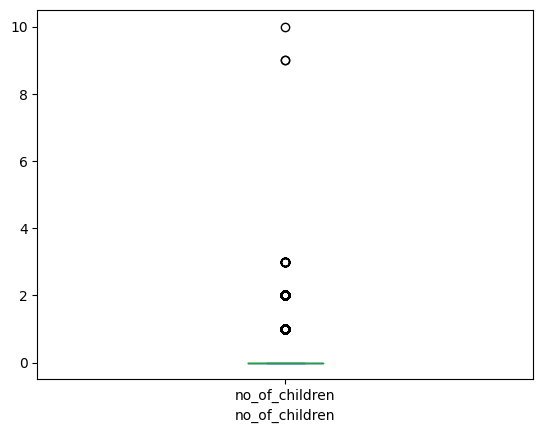

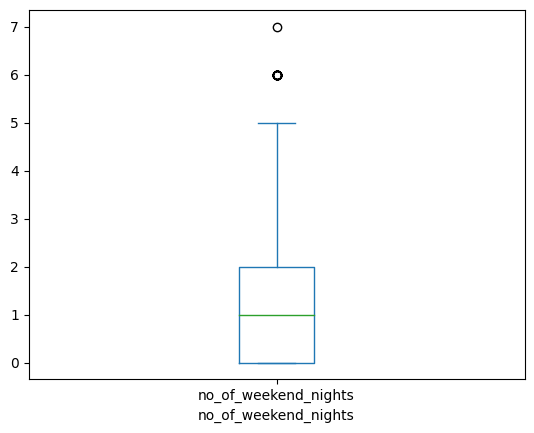

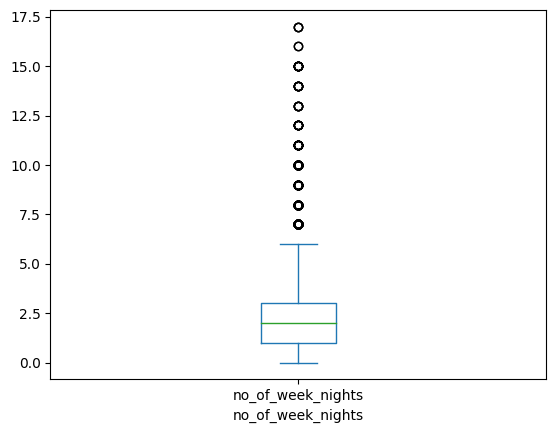

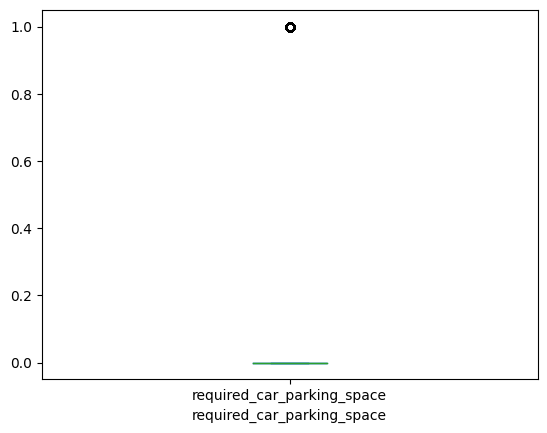

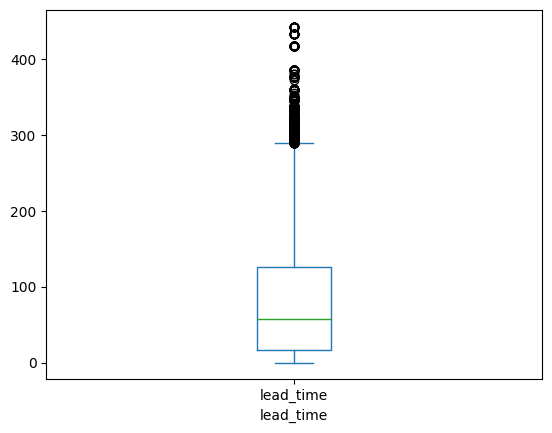

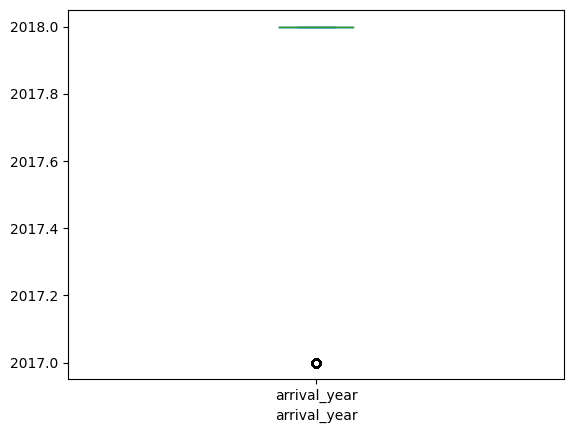

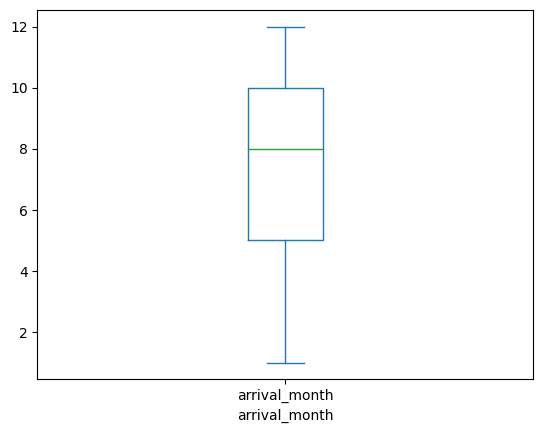

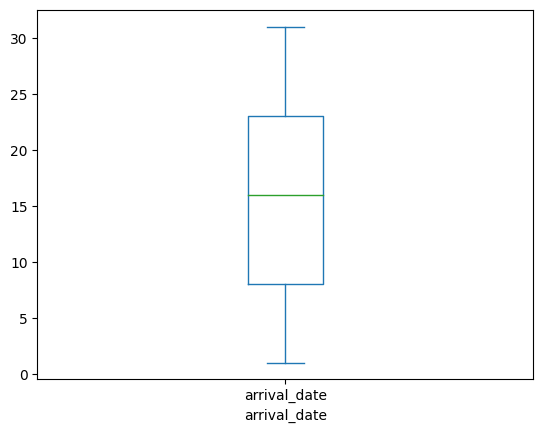

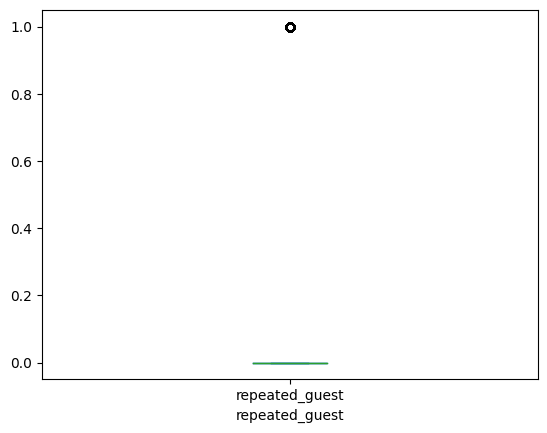

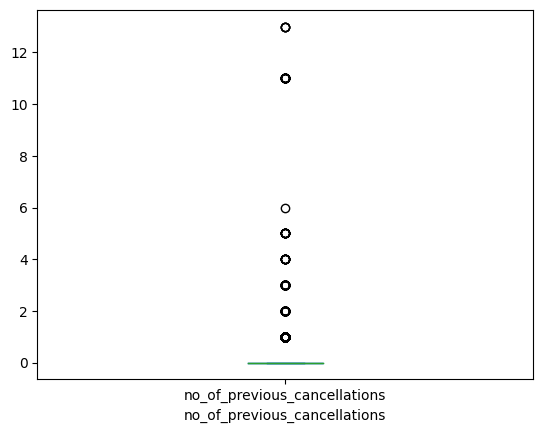

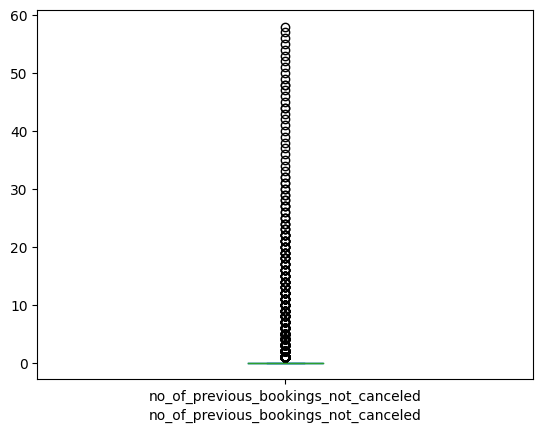

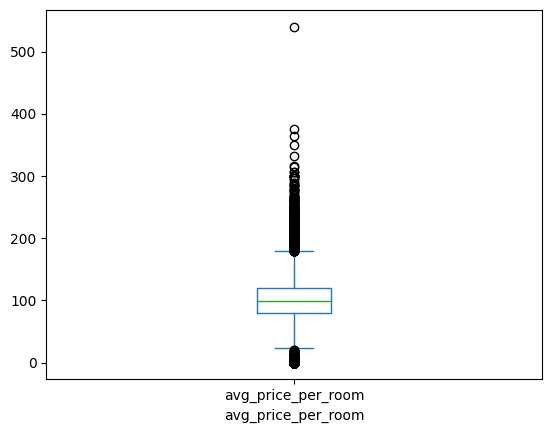

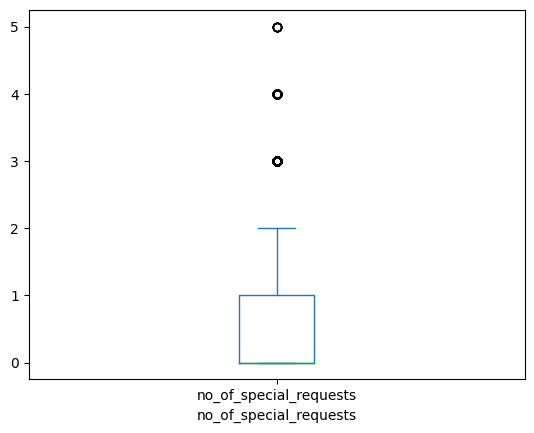

In [178]:
# box plot чтобы выявить выбросы
for i in Numerical_Features.columns:
    Hotel_Reservation_Data[i].plot.box()
    plt.xlabel(str(i))
    plt.show()

In [179]:
# Избавляемся от выбросов
def outlier_var(x):
    if ((x.dtype=="float") or (x.dtype == "int64")):
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        lc = q1 - 1.5 * iqr
        uc = q3 + 1.5 * iqr
        x = x.clip(lower = lc, upper = uc)
    else:
        x
    return x 

In [180]:
Hotel_Reservation_Data  = Hotel_Reservation_Data.apply(outlier_var)

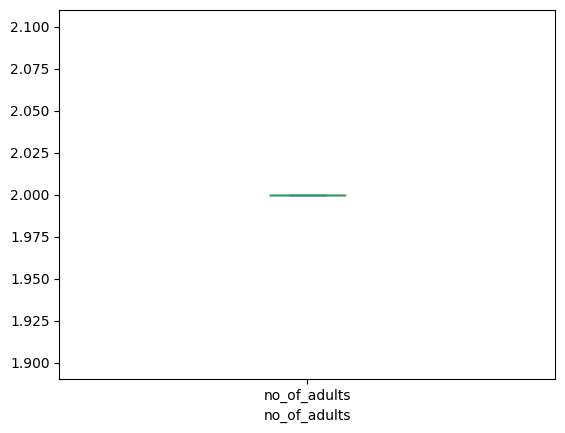

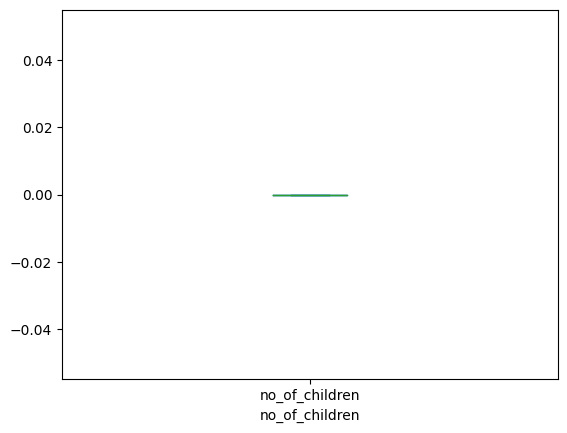

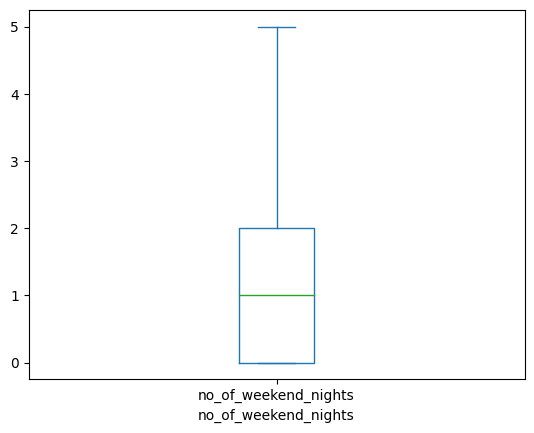

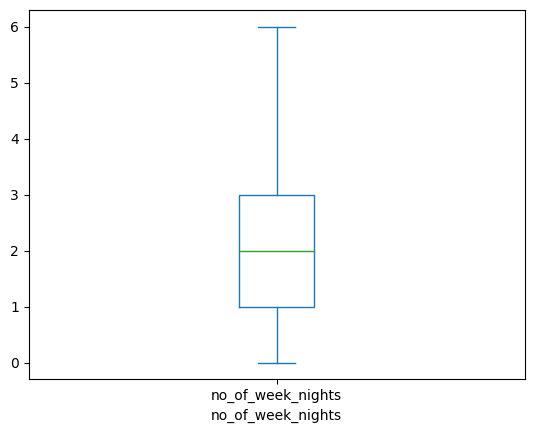

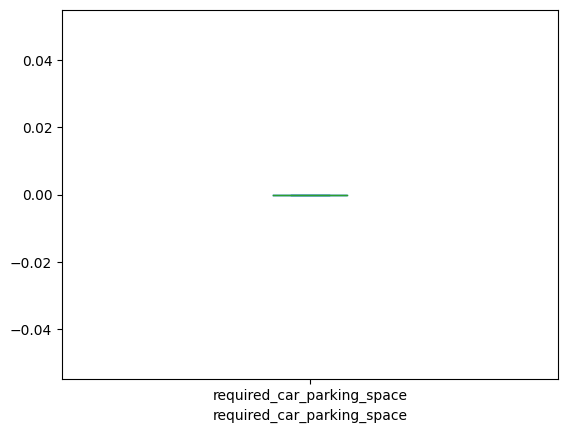

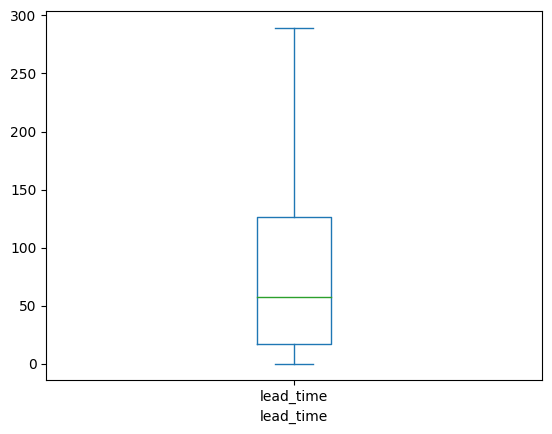

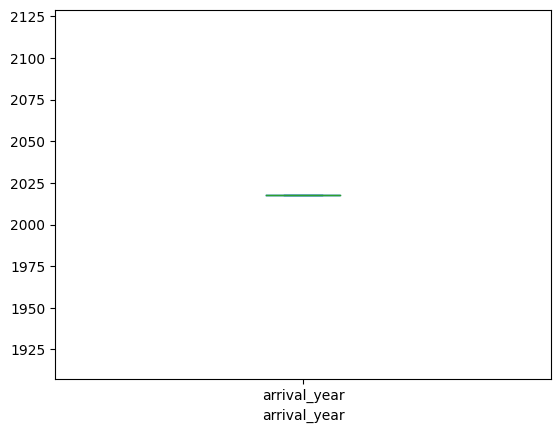

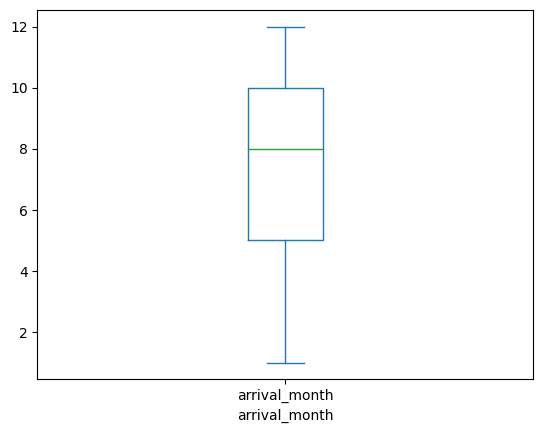

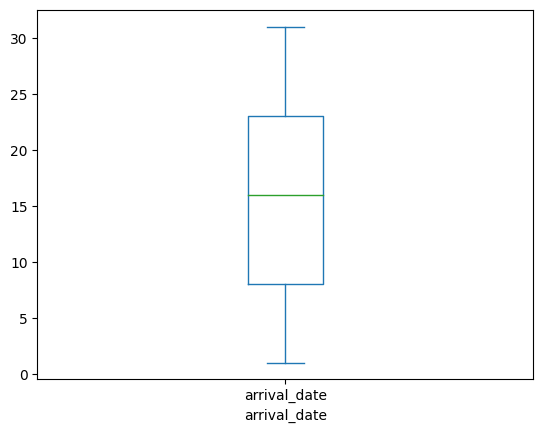

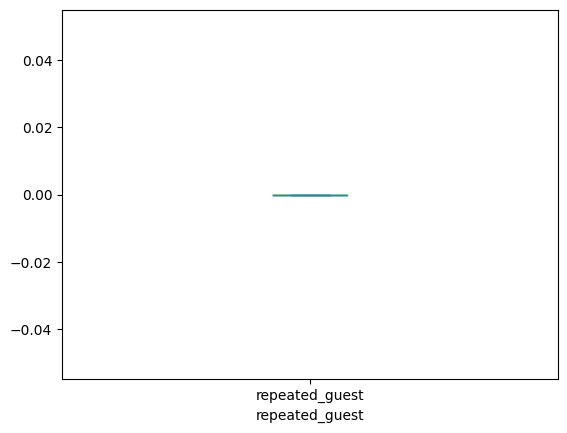

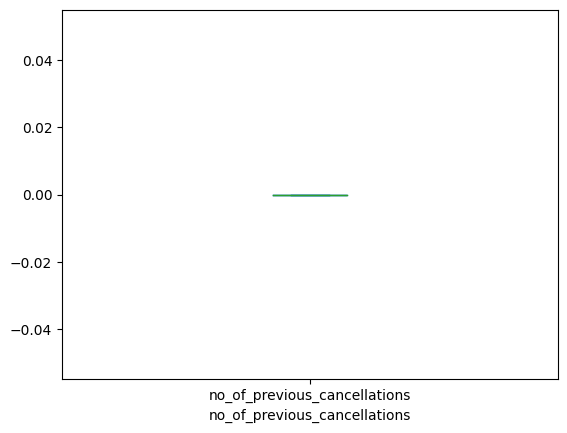

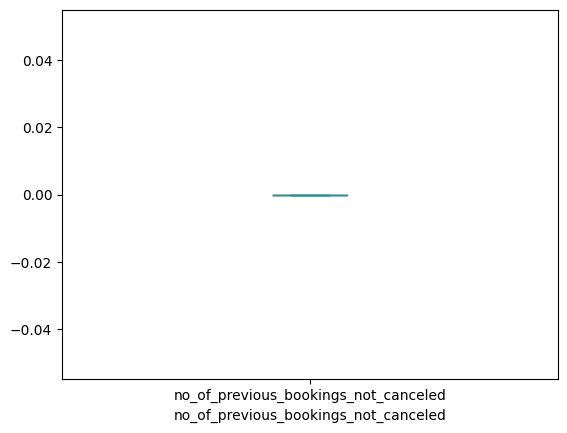

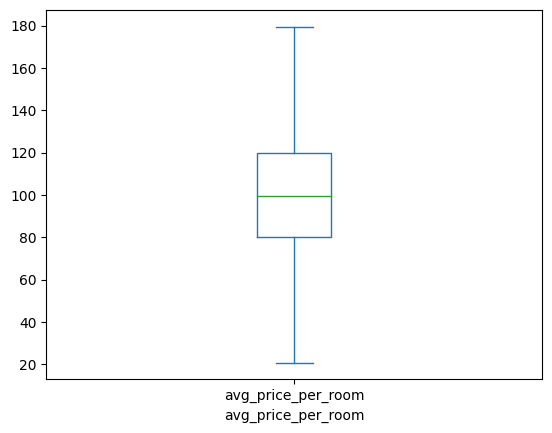

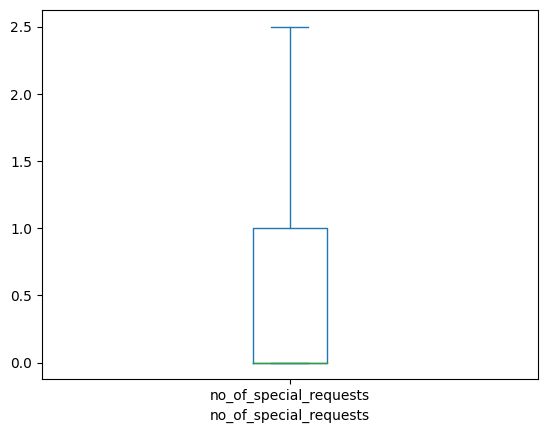

In [181]:
# box plot после избавления от выбросов
for i in Numerical_Features.columns:
    Hotel_Reservation_Data[i].plot.box()
    plt.xlabel(str(i))
    plt.show()

In [182]:
Categorical_Features.columns

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

In [183]:
Categorical_Features.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [184]:
Categorical_Features.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [185]:
Categorical_Features.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [186]:
Categorical_Features.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [187]:
# converting target variable into numerical value
Hotel_Reservation_Data['booking_status'] = np.where((Hotel_Reservation_Data['booking_status'] == 'Canceled'),1,0)

In [188]:
Hotel_Reservation_Data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224.0,2018,10,2,Offline,0,0,0,65.00,0.0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5.0,2018,11,6,Online,0,0,0,106.68,1.0,0
2,2,0,2,1,Meal Plan 1,0,Room_Type 1,1.0,2018,2,28,Online,0,0,0,60.00,0.0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211.0,2018,5,20,Online,0,0,0,100.00,0.0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48.0,2018,4,11,Online,0,0,0,94.50,0.0,1


In [189]:
Hotel_Reservation_Data['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

# Делаем тестовую и тренировочную выборки

In [190]:
X = Hotel_Reservation_Data.iloc[:,0:17]

In [191]:
Y = Hotel_Reservation_Data.iloc[:,-1]

In [192]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,
                                              test_size=0.3,
                                              random_state=42,
                                              )

In [193]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
29580,2,0,1,3,Meal Plan 1,0,Room_Type 1,200.0,2018,8,29,Online,0,0,0,90.95,0.0
6325,2,0,1,3,Meal Plan 1,0,Room_Type 1,79.0,2018,3,24,Online,0,0,0,90.95,1.0
33899,2,0,1,4,Meal Plan 1,0,Room_Type 4,78.0,2018,4,6,Online,0,0,0,99.45,1.0
720,2,0,2,0,Meal Plan 1,0,Room_Type 1,61.0,2018,10,4,Offline,0,0,0,91.00,0.0
22120,2,0,0,4,Meal Plan 1,0,Room_Type 1,201.0,2018,11,1,Online,0,0,0,82.28,2.5


In [194]:
X_train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [195]:
X_test.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [196]:
y_train.head()

29580    1
6325     1
33899    0
720      0
22120    0
Name: booking_status, dtype: int32

In [197]:
y_test.head()

4968     0
34540    0
36108    0
1553     1
24974    0
Name: booking_status, dtype: int32

In [198]:
# Векторизация
x_train = pd.get_dummies(X_train,columns=['type_of_meal_plan','room_type_reserved','market_segment_type']) 
print(x_train.shape)
x_test = pd.get_dummies(X_test,columns=['type_of_meal_plan','room_type_reserved','market_segment_type']) 
print(x_test.shape)


(25392, 30)
(10883, 30)


In [199]:
# Выбор признаков
from sklearn.feature_selection import SelectKBest,chi2
fs = SelectKBest(score_func= chi2, k=20)
fs.fit(x_train, y_train)
X_train_fs = fs.transform(x_train)
X_test_fs = fs.transform(x_test)
y_1 = x_train.columns[fs.get_support()]
z_1 = x_test.columns[fs.get_support()]
X_train_1 = pd.DataFrame(X_train_fs,columns = y_1)
X_test_1 = pd.DataFrame(X_test_fs, columns = z_1)                                  
print(X_train_1.shape, X_test_1.shape)

(25392, 20) (10883, 20)


# kNN

In [201]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train_1, y_train)

KNeighborsClassifier(n_neighbors=10)

In [202]:
knn

KNeighborsClassifier(n_neighbors=10)

In [203]:
y_test_predict = knn.predict(X_test_1)
err_test  = np.mean(y_test  != y_test_predict)

In [204]:
err_test = 1 - knn.score(X_test_1, y_test) # Другой способ

In [205]:
err_test

0.19332904530000916

In [206]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[6846  430]
 [1674 1933]]


In [207]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

In [208]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train_1, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.19502203421894038 10


In [209]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train_1, y_train)

err_train = np.mean(y_train != knn.predict(X_train_1))
err_test  = np.mean(y_test  != knn.predict(X_test_1))

print(err_train, err_test)

0.16859640831758035 0.1933290453000092


# Результаты
Ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о небольшом переобучении модели.
Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.

# Логистическая регрессия

In [217]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train_1, y_train)

y_test_predict = clf.predict(X_test_1)
y_train_predict = clf.predict(X_train_1)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_predict)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_predict)}", end="\n\n")

err_train=0.20014177693761814
err_test=0.1962694110079941

train confusion matrix:
[[15205  1909]
 [ 3173  5105]]

test confusion matrix:
[[6516  760]
 [1376 2231]]



# RandomForestClassifier

In [210]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
Model = RandomForestClassifier(n_estimators=200, max_depth=20, criterion='gini')
Model.fit(X_train_1, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [212]:
predicted = Model.predict(X_test_1)
predicted

array([0, 0, 0, ..., 0, 1, 1])

In [213]:
df1 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':predicted})
df1.head()

,Real Values,Predicted Values
4968,0,0
34540,0,0
36108,0,0
1553,1,1
24974,0,0


In [214]:
from sklearn.metrics import classification_report

In [215]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7276
           1       0.89      0.81      0.85      3607

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



In [218]:
#Training accuracy
from sklearn.metrics import accuracy_score
X_train_pred = Model.predict(X_train_1)
train_acc = accuracy_score(X_train_pred,y_train)
print("Training accuracy is {}".format(train_acc))
X_test_pred = Model.predict(X_test_1)
test_acc = accuracy_score(X_test_pred,y_test)
print("Testing accuracy is {}".format(test_acc))

Training accuracy is 0.9788909892879647
Testing accuracy is 0.9025084994946246


Training accuracy is 0.9788122243226213

Testing accuracy is 0.9014977487825048

# Полносвязная неглубокая нейронная сеть

In [219]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (20,),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 7, max_iter=100)

mlp_model.fit(X_train_1, y_train)

y_test_predict = mlp_model.predict(X_test_1)
y_train_predict = mlp_model.predict(X_train_1)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_predict)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_predict)}", end="\n\n")

err_train=0.18206521739130435
err_test=0.18496738031792703

train confusion matrix:
[[15663  1451]
 [ 3172  5106]]

test confusion matrix:
[[6688  588]
 [1425 2182]]



C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [220]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (20,), 
                              solver = 'adam', activation = 'logistic', max_iter=100, random_state = 7)
    mlp_model.fit(X_train_1, y_train)

    y_train_pred = mlp_model.predict(X_train_1)
    y_test_pred = mlp_model.predict(X_test_1)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


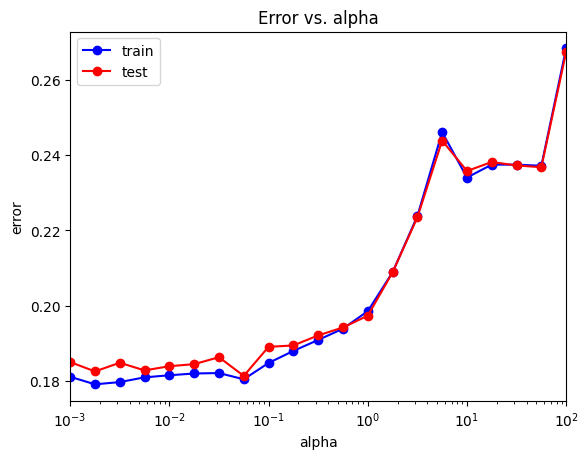

In [221]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

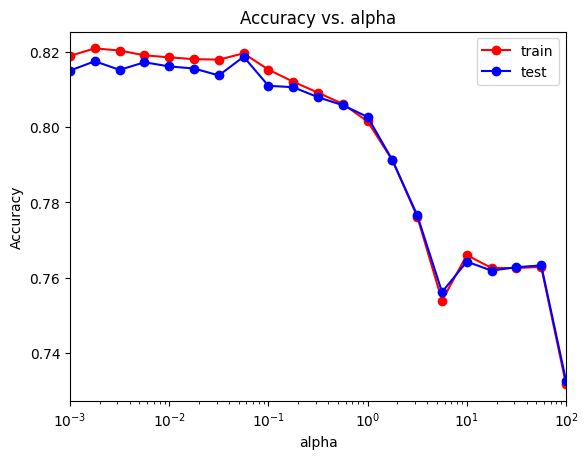

In [222]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [223]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(f"{min_train_err=}\n{min_test_err=}")

min_train_err=0.17915091367359798
min_test_err=0.18138380961132042


In [224]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(f"{alpha_opt=}")

alpha_opt=array([0.05623413])


## Полносвязная неглубокая нейронная сеть с оптимальный alpha

In [227]:
mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (20,),
                          solver = 'adam', activation = 'logistic', random_state = 7, max_iter=500)
mlp_model.fit(X_train_1, y_train)

y_test_predict = mlp_model.predict(X_test_1)
y_train_predict = mlp_model.predict(X_train_1)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_predict)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_predict)}", end="\n\n")

err_train=0.1694234404536862
err_test=0.17550307819535055

train confusion matrix:
[[15554  1560]
 [ 2742  5536]]

test confusion matrix:
[[6623  653]
 [1257 2350]]



# Результаты
Проведенные эксперименты показывают следующее: лучшую точность показывает метод Random Forest, лучшую скорость обучения - алгоритм линейной регрессии. Неглубокая нейронная сеть (20 скрытых слоев) показывает средние результаты (точность выше, чем у линейной регрессии, а скорость обучения выше, чем у Random Forest).

В целом, точность на тренировочной выборке у всех методов выше, чем на тестовой, что может свидетельствовать о небольшом переобучении всех моделей.
Подбор параметра alpha в данном случае помог улучшить точность нейронной сети незначительно (прирост менее 1%).